### Ejercicio 2: ¿Estrategias para el “cachipún”? ###
El llamado “cachipún” (como es conocido en Chile el juego de “piedra, papel o tijera”) es un juego
que utilizamos desde la niñez para resolver disputas por medio del azar. Consiste en que dos jugadores
realizan con su mano, y de manera simultánea, alguna de las tres formas posibles en el juego. Las reglas
del juego son: piedra gana contra tijera y pierde contra papel; papel gana contra piedra (y pierde contra
tijera); y, por lo tanto, tijera gana contra papel y pierde contra piedra. Si ponemos atención, tenemos 3
opciones a elegir en cada jugada, y cada opción tiene las mismas chances de ganar, empatar, o perder
frente a las otras opciones.


Vamos a calcular, por medio de una simulación Monte Carlo, si hay alguna estrategia que nos
permita aumentar nuestras chances de ganar si elegimos jugar preferencialmente una opción por sobre
las otras dos. Para ello, calcularemos la Probability Density Function eligiendo una de las opciones en
cierto porcentaje M por sobre las otras dos (estas otras dos opciones serán elegidas de manera aleatoria
con porcentaje 1 - M/2 cada una). El jugador contrincante realizará siempre sus jugadas de manera
aleatoria con probabilidad de ⅓ cada una. Realice un gráfico de la PDF (evaluando M entre 0 y 1). Se
sugiere evaluar la PDF en intervalos de 0,01 de ancho con alrededor de 10.000 jugadas en cada
intervalo. ¿Cuál sería la mejor estrategia de juego? Hint: Para optimizar la velocidad del código, obtenga
las 10.000 jugadas de una sola vez en Numpy y realice sus operaciones utilizando arrays.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Se necesita generar aleatoriamente 3 variables, en este caso usaremos numeros enteros correspondientes de la siguiente manera: 1 = Piedra | 2 = Papel | 3 = Tijera ###

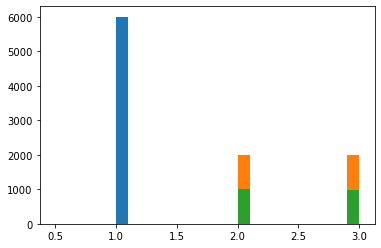

In [50]:
a=np.random.randint(1,2,6000)
b=np.random.randint(2,4,4000)
c=np.random.randint(2,4,2000) #histograma de control (verde)
plt.hist(a)
plt.hist(b)
plt.hist(c)
z = np.append(a,b)
np.random.shuffle(z)

(array([6000.,    0.,    0.,    0.,    0., 1997.,    0.,    0.,    0.,
        2003.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

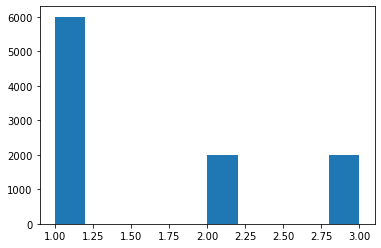

In [51]:
plt.hist(z)

In [67]:
i=0.02
n=10000
M=int(n*(i))

a=np.random.randint(1,2,M)
b=np.random.randint(2,4,n-M)
c=np.random.randint(1,4,n) # jugadas realizas al azar con 1/3 de probabilad cada jugada
z = np.append(a,b)
np.random.shuffle(z)

(array([3348.,    0.,    0.,    0.,    0., 3331.,    0.,    0.,    0.,
        3321.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

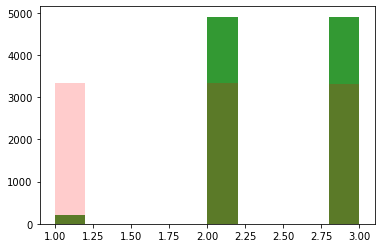

In [77]:
plt.hist(z,alpha=0.8,color='g')
plt.hist(c,alpha=0.2,color='r')


(array([  73.,    0., 1716.,    0.,    0., 3282.,    0., 3261.,    0.,
        1668.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <BarContainer object of 10 artists>)

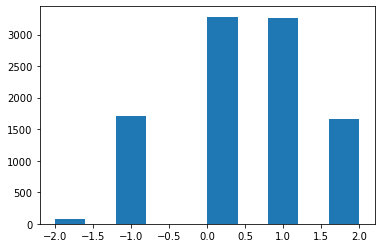

In [83]:
plt.hist(z-c)

## ahora necesitamos comprobar si ganan  en un enfretamiento ##
### 1) piedra -- 2) papel -- 3) tijera ### 

## los vectores de combinatoria indica que al restar: ##
#### 1 - (1,2,3) = (0,-1,-2)  | 2 - (1,2,3) = (1,0,-1) | 3 - (1,2,3) = (2,1,0) ###
### -2 => victoria ; -1 => derrota (en cualquier caso) ; 0 => empate ; 1 => victoria (cada caso) ; 2 => derrota ###
#### Pied - (Pied, Papel, Tij) ----> (== , X , O)  ||||| Papel - (Pied, Papel, Tij) ----> (O, == , X) ||||| Tij - (Pied, Papel, Tij) = (X, O , ==) ###


### repetir para cada intervalo con bins de 0.01 para M ###

Realice un gráfico de la PDF (evaluando M entre 0 y 1). Se sugiere evaluar la PDF en intervalos de 0,01 de ancho con alrededor de 10.000 jugadas en cada intervalo. ¿Cuál sería la mejor estrategia de juego? Hint: Para optimizar la velocidad del código, obtenga las 10.000 jugadas de una sola vez en Numpy y realice sus operaciones utilizando arrays.

(array([168560.,      0., 252303.,      0.,      0., 336724.,      0.,
        168318.,      0.,  84095.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <BarContainer object of 10 artists>)

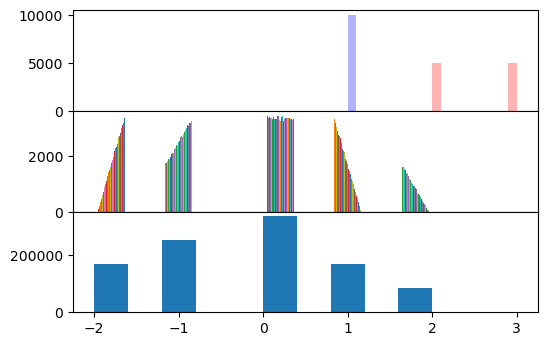

In [167]:
n=10000
result = []
bineo = []
WINS = []
LOSES = []
DRAW = []
f,axs = plt.subplots(3,1,dpi=100,sharex='col')
f.subplots_adjust(hspace=0)
for i in range(0,101):
    m = i/100 #esto nos da los intervalos de 0.01 hasta completar 1 --> 100 iteraciones
    bineo += [m]
    M=int(n*(m))
    a=np.random.randint(1,2,M)
    #NOTAR QUE TOMAOS LA PIEDRA COMO PRUEBA LOS RESULTADOS DEBERIAN SER ANALOGOS CON PAPEL Y TIJERA 
    
    b=np.random.randint(2,4,n-M)
    c=np.random.randint(1,4,n) # jugadas realizas al azar con 1/3 de probabilad cada jugada
    z = np.append(a,b)
    np.random.shuffle(z)
    mix = z-c
    result += [mix]

#### APROVECHAMOS DE OBTENER LA CANTIDAD DE VICTORIAS EN CADA ITERACION #########################
#################################################################################################
    wineo = np.where((mix == -2) | (mix==1))[0]
    loseo = np.where((mix == -1) | (mix==2))[0]
    draw = np.where((mix == 0))[0]

    win = (len(resultados[wineo])/n)*100
    los = (len(resultados[loseo])/n)*100
    emp = (len(resultados[draw])/n)*100
    
    WINS += [win]
    LOSES += [los]
    DRAW += [emp]
#################################################################################################
    
    
    if i == 0:
        axs[0].hist(z, alpha=0.3, color='red')
    elif i == 100:
        axs[0].hist(z, alpha=0.3, color='b')
        
axs[1].hist(result)        
np.shape(result)
resultados = np.concatenate(result)
axs[2].hist(resultados)

#NOTA: USAMOS 101 ITERACIONES CONSIDERANDO 2 CASOS ESPECIALES *1er histograma*
#PRIMER CASO: 0% PROBABILIDAD DE USAR PIEDRA
#SEGUNDO CASO: 100% PROBABILIDAD DE USAR PIEDRA
#(POR EFECTOS DE MUESTRA) "YO" CONSIDERO QUE NO SE DEBERIAN TOMAR EN CUENTA NINGUNO O TOMAR AMBOS

In [204]:
wineo = np.where((resultados == -2) | (resultados==1))[0]
loseo = np.where((resultados == -1) | (resultados==2))[0]
draw = np.where((resultados == 0))[0]

win = len(resultados[wineo])
los = len(resultados[loseo])
emp = len(resultados[draw])

print(f'Resultados:')
print(f'Victorias totales: {win}')
print(f'Derrotas totales: {los}')
print(f'Empates totales: {emp}')
print(f'Juegos totales: {len(resultados)}')

Resultados:
Victorias totales: 336878
Derrotas totales: 336398
Empates totales: 336724
Juegos totales: 1010000


[Text(0.5, 0, 'porcentaje de victoria (%)')]

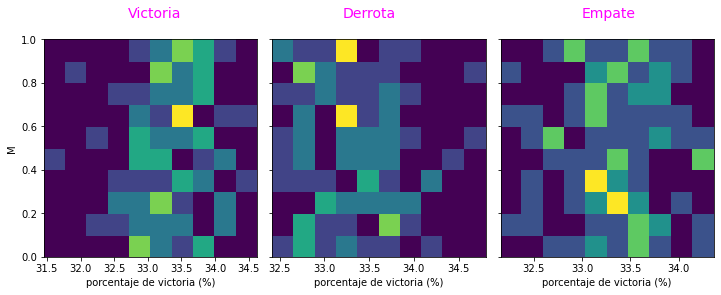

In [201]:
f, axs = plt.subplots(1,3,sharey='row', figsize=(12, 4))
f.subplots_adjust(wspace=0.07)

axs[0].hist2d(WINS,bineo)
axs[0].text(32.7,1.1,'Victoria',fontsize=14,color='magenta')
axs[1].hist2d(LOSES,bineo)
axs[1].text(33.2,1.1,'Derrota',fontsize=14,color='magenta')
axs[2].hist2d(DRAW,bineo)
axs[2].text(33,1.1,'Empate',fontsize=14,color='magenta')
axs[0].set(xlabel='porcentaje de victoria (%)', ylabel='M')
axs[1].set(xlabel='porcentaje de victoria (%)')
axs[2].set(xlabel='porcentaje de victoria (%)')

[Text(0.5, 1.0, 'PDF Empates'), Text(0.5, 0, 'M')]

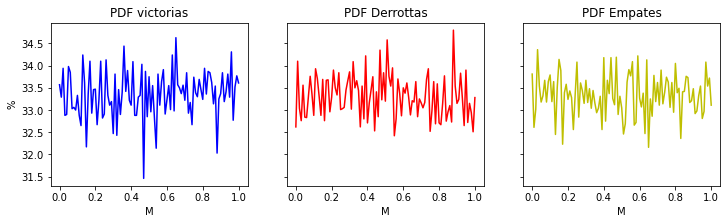

In [214]:
f, axs = plt.subplots(1,3,sharey='row',figsize=(12,3))
axs[0].plot(bineo,WINS,c='b')
axs[0].set(title='PDF victorias',ylabel='%', xlabel='M')
axs[1].plot(bineo,LOSES,c='r')
axs[2].plot(bineo,DRAW,c='y')
axs[1].set(title='PDF Derrottas', xlabel='M')
axs[2].set(title='PDF Empates', xlabel='M')


# CONCLUSIÓN #
### AL observar las matrices de datos que representan las victorias  y su PDF, si bien se puede observar que poseen ciertos peaks, no son dominantes, debido a que el porcentaje de victoria no escapa o no impone una supremacia notoria por sobre el 1/3 de probabilidad, por lo cual solo queda suponer que no hay una estrategia dominante al uso de piedra, papel o tijeras cuando se trata de usar una variable en diferentes proporciones respecto a la otra. ###

## cosas que no fueron consideradas por el ejercicio: ##
### 1) No esta considerada la reiteración (repetir la misma variable hasta obtener una victoria) ###
### 2) No se considera usar diferentes proporciones en las otras variables (papel o tijeras para este caso ###
### 3) No se considero que el juego del contrario se viera afectado por lo que jugaba el primero ###